## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9790639	total: 55.8ms	remaining: 55.8s
1:	learn: 0.9464185	total: 56.1ms	remaining: 28s
2:	learn: 0.9188385	total: 56.4ms	remaining: 18.7s
3:	learn: 0.8876740	total: 56.9ms	remaining: 14.2s
4:	learn: 0.8626518	total: 57.1ms	remaining: 11.4s
5:	learn: 0.8344533	total: 57.5ms	remaining: 9.53s
6:	learn: 0.8117805	total: 57.9ms	remaining: 8.22s
7:	learn: 0.7883139	total: 58.4ms	remaining: 7.24s
8:	learn: 0.7619926	total: 58.9ms	remaining: 6.49s
9:	learn: 0.7382351	total: 59.4ms	remaining: 5.88s
10:	learn: 0.7150733	total: 59.8ms	remaining: 5.38s
11:	learn: 0.6942860	total: 60.1ms	remaining: 4.95s
12:	learn: 0.6743194	total: 60.7ms	remaining: 4.61s
13:	learn: 0.6551526	total: 61ms	remaining: 4.29s
14:	learn: 0.6344800	total: 61.2ms	remaining: 4.01s
15:	learn: 0.6157703	total: 61.8ms	remaining: 3.8s


16:	learn: 0.5963991	total: 63.4ms	remaining: 3.67s
17:	learn: 0.5790688	total: 63.8ms	remaining: 3.48s
18:	learn: 0.5620742	total: 64.1ms	remaining: 3.31s
19:	learn: 0.5451572	total: 64.8ms	remaining: 3.18s
20:	learn: 0.5294639	total: 65.2ms	remaining: 3.04s
21:	learn: 0.5137766	total: 66ms	remaining: 2.93s
22:	learn: 0.4974475	total: 66.5ms	remaining: 2.82s
23:	learn: 0.4817079	total: 66.9ms	remaining: 2.72s
24:	learn: 0.4676469	total: 67.4ms	remaining: 2.63s
25:	learn: 0.4533085	total: 67.9ms	remaining: 2.54s
26:	learn: 0.4401035	total: 68.3ms	remaining: 2.46s
27:	learn: 0.4278579	total: 68.7ms	remaining: 2.38s
28:	learn: 0.4143581	total: 69.1ms	remaining: 2.31s
29:	learn: 0.4032423	total: 69.6ms	remaining: 2.25s
30:	learn: 0.3919976	total: 69.9ms	remaining: 2.19s
31:	learn: 0.3802737	total: 70.4ms	remaining: 2.13s
32:	learn: 0.3691495	total: 71ms	remaining: 2.08s
33:	learn: 0.3587038	total: 71.3ms	remaining: 2.03s
34:	learn: 0.3485372	total: 71.9ms	remaining: 1.98s
35:	learn: 0.338

190:	learn: 0.0435172	total: 158ms	remaining: 670ms
191:	learn: 0.0433271	total: 159ms	remaining: 667ms
192:	learn: 0.0431886	total: 159ms	remaining: 665ms
193:	learn: 0.0430654	total: 160ms	remaining: 663ms
194:	learn: 0.0429329	total: 160ms	remaining: 661ms
195:	learn: 0.0427141	total: 161ms	remaining: 660ms
196:	learn: 0.0425773	total: 162ms	remaining: 658ms
197:	learn: 0.0424255	total: 162ms	remaining: 658ms
198:	learn: 0.0423112	total: 163ms	remaining: 656ms
199:	learn: 0.0421166	total: 164ms	remaining: 654ms
200:	learn: 0.0419653	total: 165ms	remaining: 654ms
201:	learn: 0.0418754	total: 165ms	remaining: 653ms
202:	learn: 0.0417262	total: 166ms	remaining: 652ms
203:	learn: 0.0416128	total: 167ms	remaining: 651ms
204:	learn: 0.0413802	total: 168ms	remaining: 650ms
205:	learn: 0.0411534	total: 168ms	remaining: 648ms
206:	learn: 0.0410809	total: 169ms	remaining: 646ms
207:	learn: 0.0409086	total: 169ms	remaining: 644ms
208:	learn: 0.0407740	total: 169ms	remaining: 641ms
209:	learn: 

295:	learn: 0.0310954	total: 210ms	remaining: 500ms
296:	learn: 0.0310579	total: 211ms	remaining: 500ms
297:	learn: 0.0309676	total: 212ms	remaining: 500ms
298:	learn: 0.0308891	total: 213ms	remaining: 499ms
299:	learn: 0.0308206	total: 213ms	remaining: 498ms
300:	learn: 0.0307265	total: 214ms	remaining: 496ms
301:	learn: 0.0306521	total: 214ms	remaining: 495ms
302:	learn: 0.0305699	total: 215ms	remaining: 494ms
303:	learn: 0.0305218	total: 215ms	remaining: 493ms
304:	learn: 0.0304292	total: 216ms	remaining: 491ms
305:	learn: 0.0303493	total: 216ms	remaining: 490ms
306:	learn: 0.0302725	total: 217ms	remaining: 489ms
307:	learn: 0.0302383	total: 217ms	remaining: 488ms
308:	learn: 0.0301925	total: 217ms	remaining: 486ms
309:	learn: 0.0301208	total: 218ms	remaining: 484ms
310:	learn: 0.0300185	total: 218ms	remaining: 483ms
311:	learn: 0.0299747	total: 218ms	remaining: 481ms
312:	learn: 0.0299055	total: 219ms	remaining: 480ms
313:	learn: 0.0298346	total: 219ms	remaining: 478ms
314:	learn: 

484:	learn: 0.0226758	total: 307ms	remaining: 326ms
485:	learn: 0.0226542	total: 308ms	remaining: 326ms
486:	learn: 0.0226319	total: 308ms	remaining: 325ms
487:	learn: 0.0226256	total: 309ms	remaining: 324ms
488:	learn: 0.0226120	total: 309ms	remaining: 323ms
489:	learn: 0.0225676	total: 309ms	remaining: 322ms
490:	learn: 0.0225586	total: 310ms	remaining: 321ms
491:	learn: 0.0225533	total: 310ms	remaining: 320ms
492:	learn: 0.0225398	total: 310ms	remaining: 319ms
493:	learn: 0.0225119	total: 310ms	remaining: 318ms
494:	learn: 0.0224993	total: 311ms	remaining: 317ms
495:	learn: 0.0224714	total: 311ms	remaining: 316ms
496:	learn: 0.0224309	total: 312ms	remaining: 315ms
497:	learn: 0.0224210	total: 312ms	remaining: 314ms
498:	learn: 0.0223974	total: 312ms	remaining: 313ms
499:	learn: 0.0223596	total: 313ms	remaining: 313ms
500:	learn: 0.0223431	total: 314ms	remaining: 313ms
501:	learn: 0.0223292	total: 314ms	remaining: 312ms
502:	learn: 0.0222928	total: 315ms	remaining: 311ms
503:	learn: 

596:	learn: 0.0200500	total: 358ms	remaining: 242ms
597:	learn: 0.0200268	total: 359ms	remaining: 242ms
598:	learn: 0.0200188	total: 360ms	remaining: 241ms
599:	learn: 0.0199794	total: 361ms	remaining: 240ms
600:	learn: 0.0199544	total: 361ms	remaining: 240ms
601:	learn: 0.0199485	total: 362ms	remaining: 239ms
602:	learn: 0.0199368	total: 362ms	remaining: 238ms
603:	learn: 0.0199073	total: 363ms	remaining: 238ms
604:	learn: 0.0198802	total: 363ms	remaining: 237ms
605:	learn: 0.0198517	total: 364ms	remaining: 237ms
606:	learn: 0.0198278	total: 364ms	remaining: 236ms
607:	learn: 0.0198103	total: 365ms	remaining: 235ms
608:	learn: 0.0197795	total: 365ms	remaining: 234ms
609:	learn: 0.0197735	total: 365ms	remaining: 234ms
610:	learn: 0.0197643	total: 366ms	remaining: 233ms
611:	learn: 0.0197402	total: 366ms	remaining: 232ms
612:	learn: 0.0197139	total: 366ms	remaining: 231ms
613:	learn: 0.0196915	total: 367ms	remaining: 230ms
614:	learn: 0.0196599	total: 367ms	remaining: 230ms
615:	learn: 

753:	learn: 0.0172049	total: 452ms	remaining: 147ms
754:	learn: 0.0171994	total: 454ms	remaining: 147ms
755:	learn: 0.0171974	total: 455ms	remaining: 147ms
756:	learn: 0.0171873	total: 456ms	remaining: 146ms
757:	learn: 0.0171615	total: 457ms	remaining: 146ms
758:	learn: 0.0171509	total: 457ms	remaining: 145ms
759:	learn: 0.0171401	total: 458ms	remaining: 145ms
760:	learn: 0.0171338	total: 458ms	remaining: 144ms
761:	learn: 0.0171247	total: 459ms	remaining: 143ms
762:	learn: 0.0171052	total: 460ms	remaining: 143ms
763:	learn: 0.0170870	total: 461ms	remaining: 142ms
764:	learn: 0.0170732	total: 461ms	remaining: 142ms
765:	learn: 0.0170600	total: 462ms	remaining: 141ms
766:	learn: 0.0170219	total: 463ms	remaining: 141ms
767:	learn: 0.0170119	total: 463ms	remaining: 140ms
768:	learn: 0.0169973	total: 464ms	remaining: 139ms
769:	learn: 0.0169625	total: 464ms	remaining: 139ms
770:	learn: 0.0169474	total: 465ms	remaining: 138ms
771:	learn: 0.0169285	total: 465ms	remaining: 137ms
772:	learn: 

847:	learn: 0.0157258	total: 505ms	remaining: 90.6ms
848:	learn: 0.0157112	total: 506ms	remaining: 90.1ms
849:	learn: 0.0156976	total: 507ms	remaining: 89.5ms
850:	learn: 0.0156867	total: 507ms	remaining: 88.9ms
851:	learn: 0.0156680	total: 508ms	remaining: 88.2ms
852:	learn: 0.0156597	total: 509ms	remaining: 87.6ms
853:	learn: 0.0156549	total: 509ms	remaining: 87ms
854:	learn: 0.0156393	total: 510ms	remaining: 86.4ms
855:	learn: 0.0156314	total: 510ms	remaining: 85.8ms
856:	learn: 0.0156196	total: 511ms	remaining: 85.2ms
857:	learn: 0.0156061	total: 511ms	remaining: 84.6ms
858:	learn: 0.0156029	total: 512ms	remaining: 84ms
859:	learn: 0.0155833	total: 512ms	remaining: 83.4ms
860:	learn: 0.0155648	total: 513ms	remaining: 82.8ms
861:	learn: 0.0155411	total: 513ms	remaining: 82.2ms
862:	learn: 0.0155233	total: 514ms	remaining: 81.6ms
863:	learn: 0.0155180	total: 514ms	remaining: 81ms
864:	learn: 0.0155013	total: 515ms	remaining: 80.4ms
865:	learn: 0.0154907	total: 515ms	remaining: 79.7ms

988:	learn: 0.0139674	total: 591ms	remaining: 6.57ms
989:	learn: 0.0139573	total: 593ms	remaining: 5.99ms
990:	learn: 0.0139445	total: 594ms	remaining: 5.39ms
991:	learn: 0.0139404	total: 594ms	remaining: 4.79ms
992:	learn: 0.0139299	total: 594ms	remaining: 4.19ms
993:	learn: 0.0139167	total: 594ms	remaining: 3.59ms
994:	learn: 0.0139098	total: 595ms	remaining: 2.99ms
995:	learn: 0.0138945	total: 595ms	remaining: 2.39ms
996:	learn: 0.0138813	total: 595ms	remaining: 1.79ms
997:	learn: 0.0138743	total: 596ms	remaining: 1.19ms
998:	learn: 0.0138668	total: 596ms	remaining: 596us
999:	learn: 0.0138533	total: 596ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.019849130649199628
ABC Pre-generator MAE 0.07863163643978953


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

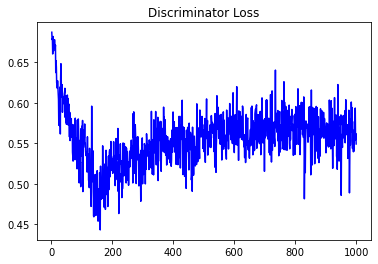

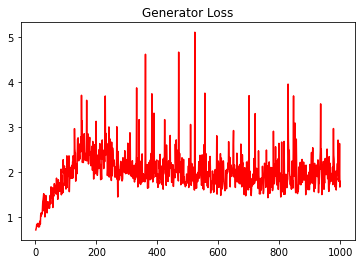

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.06500058009119873


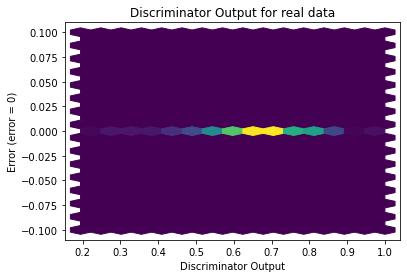

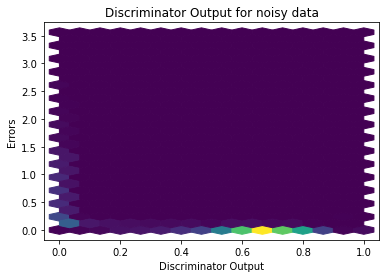

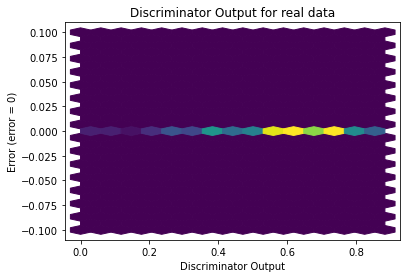

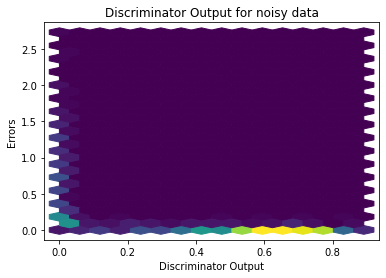

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


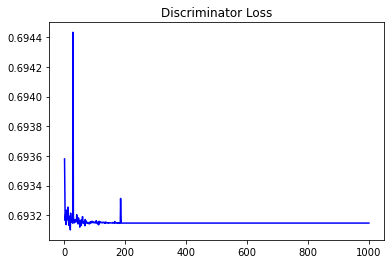

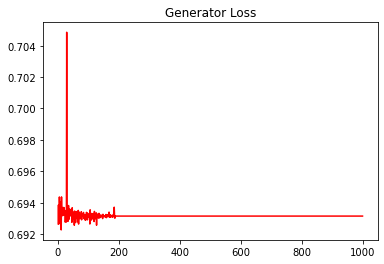

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.08302572355048532


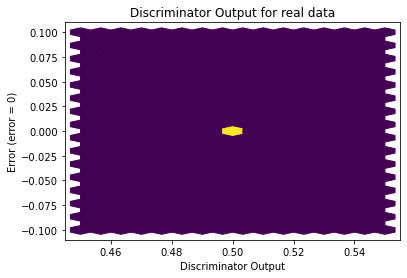

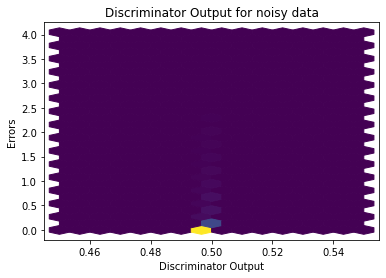

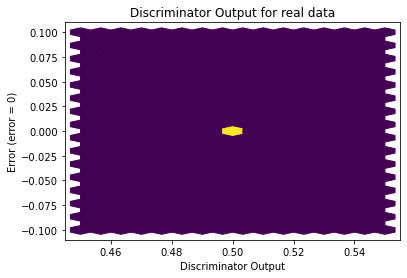

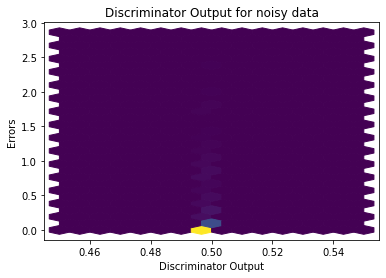

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


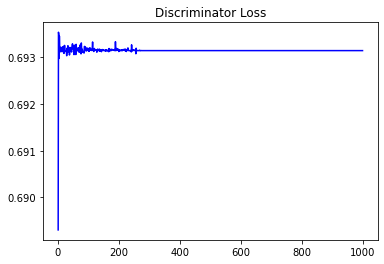

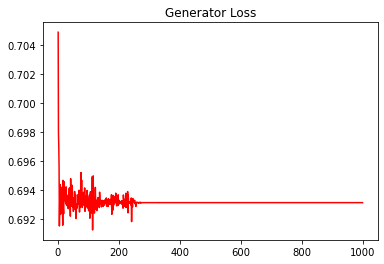

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.08239104306691193


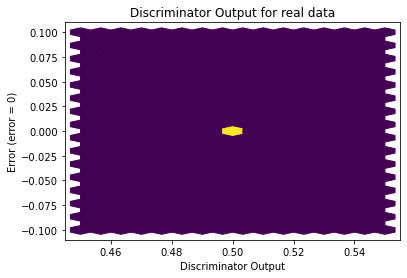

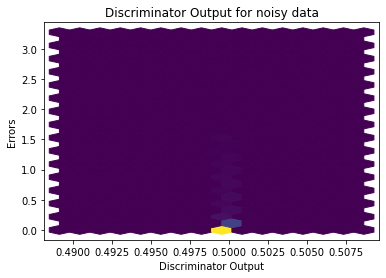

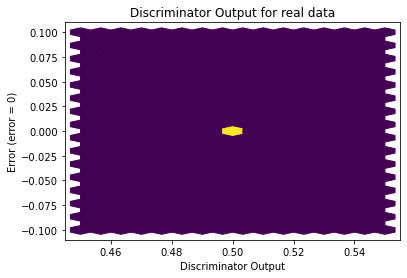

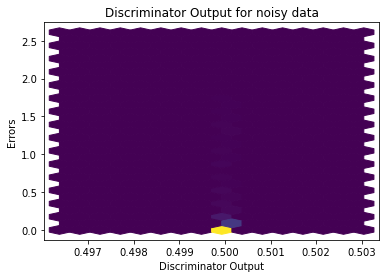

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0028]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0232]], requires_grad=True)
